<a href="https://colab.research.google.com/github/ProfAI/machine-learning-modelli-e-algoritmi/blob/main/7%20-%20Decision%20Tree%20e%20Random%20Forest/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

### Importiamo i moduli

In [ ]:
from sklearn.model_selection import train_test_split

### Definiamo le costanti

In [ ]:
RANDOM_SEED = 0

### Carichiamo il dataset

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_SEED)

### Addestriamo l'albero

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

1.0

### Visualizziamo l'albero

#### Metodo 1: Testuale

In [ ]:
from sklearn.tree import export_text

print(export_text(tree, feature_names=iris.feature_names))

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



#### Metodo 2: Grafico

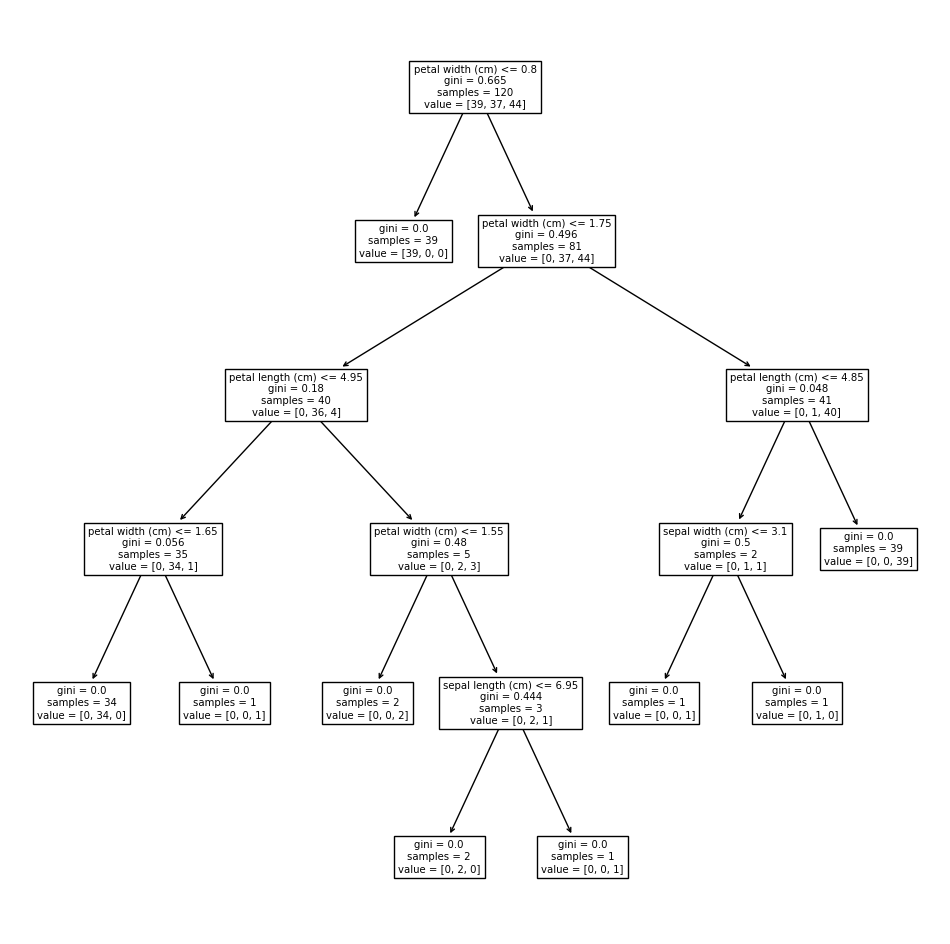

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12,12))
plot_tree(tree, feature_names=iris.feature_names)
plt.show()

#### Metodo 3: GraphViz

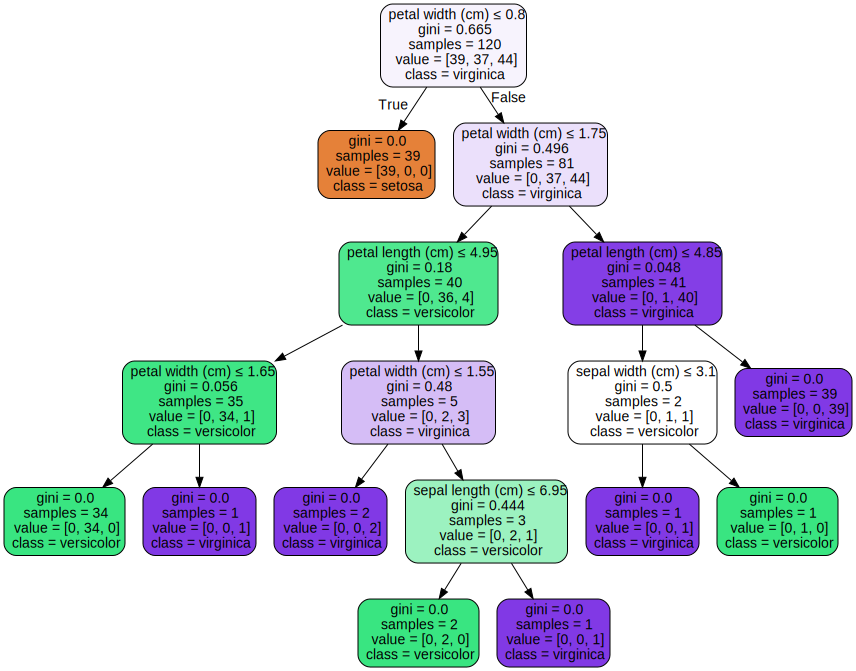

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file=None,
                      feature_names=iris.feature_names,
                      class_names=iris.target_names,
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
#graph.render("iris")
graph

In [ ]:
from IPython.display import Image, display

def tree_viz(tree, feature_names, class_names):
  dot_data = export_graphviz(tree, out_file=None,
                        feature_names=feature_names,
                        class_names=class_names,
                        filled=True, rounded=True,
                        special_characters=True)
  graph = graphviz.Source(dot_data, filename="tree", format="png")
  graph.view()
  display(Image("tree.png"))

### Pruning

#### Pre-Pruning
- Limitare la profondità = max_depth
- Definire un numero minimo di esempi per foglia = min_samples_leaf
- Definire un numero minimo di esempi per ogni split = min_samples_split
- Definire una massima impurità accettata = min_impurity_decrease


In [ ]:
tree = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

1.0

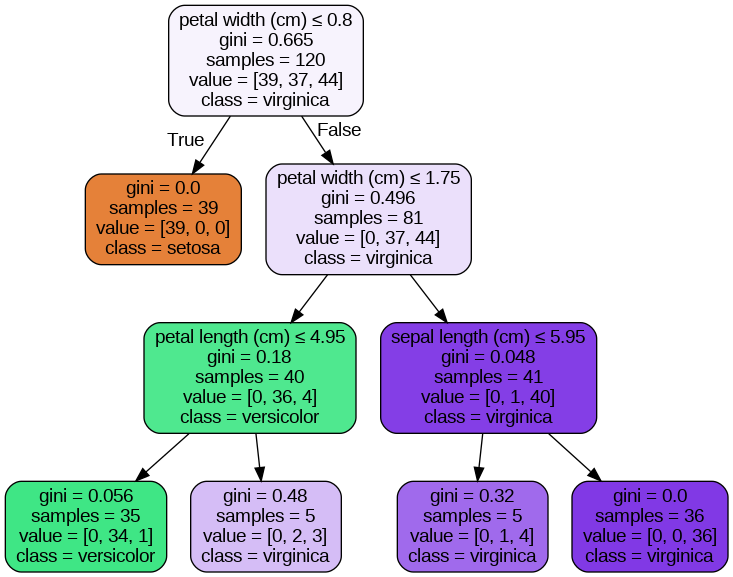

In [ ]:
tree_viz(tree, iris.feature_names, iris.target_names)

### Post-Pruning

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(ccp_alpha=.1)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.9666666666666667

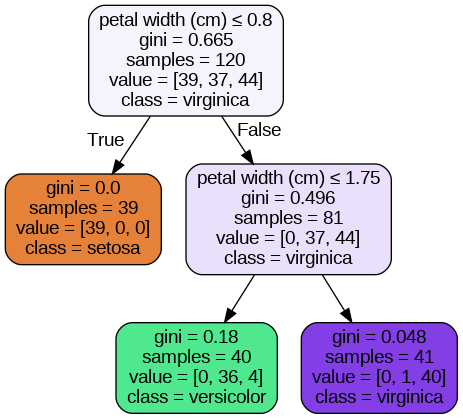

In [ ]:
tree_viz(tree, iris.feature_names, iris.target_names)